In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [38]:
hawk = pd.read_csv("C:\\Users\\karathul\\Downloads\\Hawks.csv")
hawk.head()

,Unnamed: 0,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,4,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Count')

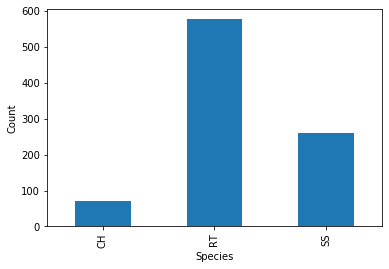

In [39]:
hawk.groupby('Species').size().plot(kind='bar')
plt.ylabel('Count')

In [40]:
hawk['Species'].value_counts()

RT    577
SS    261
CH     70
Name: Species, dtype: int64

In [5]:
hawk= hawk.replace(' ', np.NaN)

In [41]:
hawk = hawk.drop('Tarsus', axis=1)
hawk = hawk.drop('WingPitFat', axis=1)
hawk = hawk.drop('ReleaseTime', axis=1)
hawk = hawk.drop('StandardTail', axis=1)

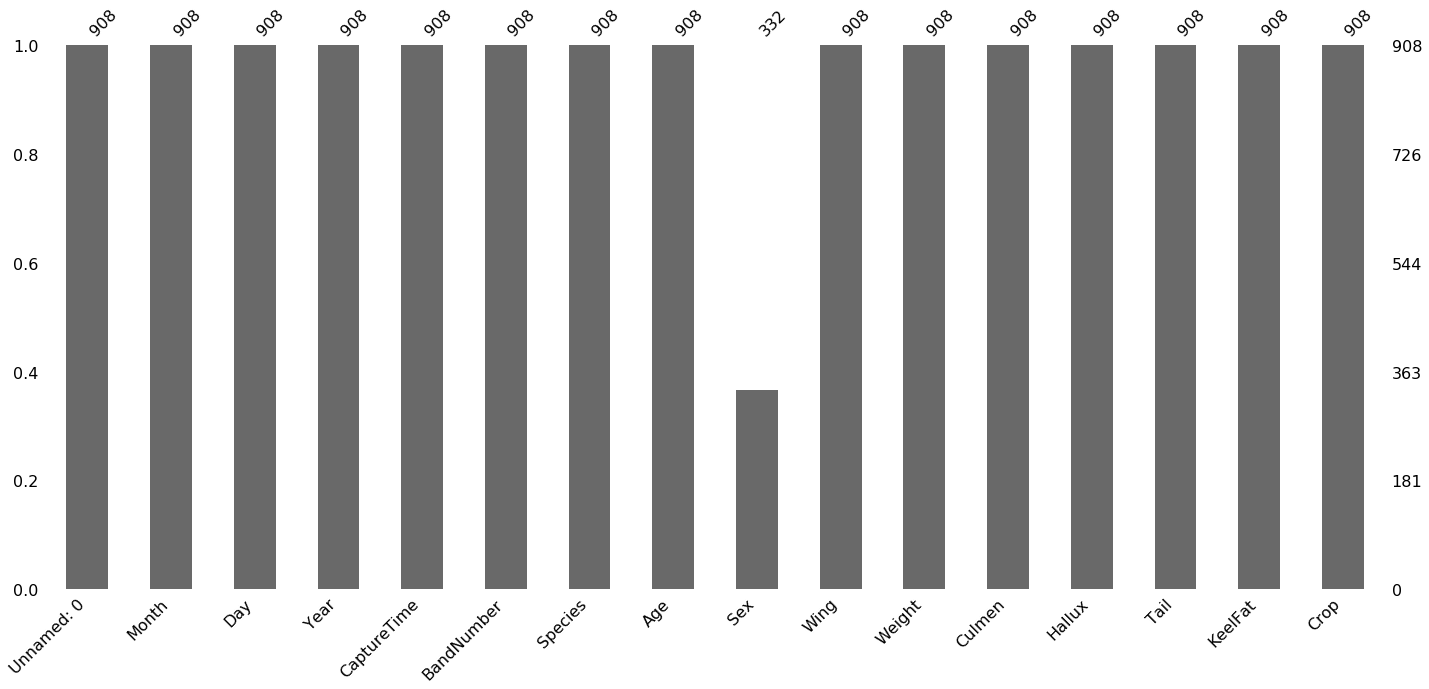

In [109]:
msno.bar(hawk)

In [43]:
print(hawk.describe())

       Unnamed: 0       Month         Day         Year        Wing  \
count   908.00000  908.000000  908.000000   908.000000  907.000000   
mean    454.50000    9.842511   15.740088  1998.253304  315.637486   
std     262.26132    0.685717    8.413164     3.454180   95.277591   
min       1.00000    8.000000    1.000000  1992.000000   37.200000   
25%     227.75000    9.000000    9.000000  1995.000000  202.000000   
50%     454.50000   10.000000   16.000000  1999.000000  370.000000   
75%     681.25000   10.000000   23.000000  2001.000000  390.000000   
max     908.00000   11.000000   31.000000  2003.000000  480.000000   

            Weight      Culmen      Hallux        Tail     KeelFat        Crop  
count   898.000000  901.000000  902.000000  908.000000  567.000000  565.000000  
mean    772.080178   21.801498   26.410865  198.831498    2.184303    0.234540  
std     462.311760    7.284175   17.734704   36.824403    1.044073    0.461597  
min      56.000000    8.600000    9.500000  1

In [39]:
missing_values_CH = hawk['Weight'][hawk['Species'] == 'CH'].isnull().sum()/len(hawk)*100
missing_values_CH

0.0

In [53]:
hawk['Weight'][hawk['Species'] == 'RT'].describe()

count     572.00000
mean     1094.43007
std       189.21025
min       101.00000
25%       980.00000
50%      1070.00000
75%      1210.00000
max      2030.00000
Name: Weight, dtype: float64

In [44]:
hawk['Weight'].fillna((hawk['Weight'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['Weight'].fillna((hawk['Weight'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['Wing'].fillna((hawk['Wing'][hawk['Species']=='CH']).mean(), inplace = True)
hawk['Culmen'].fillna((hawk['Culmen'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['Culmen'].fillna((hawk['Culmen'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['Hallux'].fillna((hawk['Hallux'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['Hallux'].fillna((hawk['Hallux'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['KeelFat'].fillna((hawk['KeelFat'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['KeelFat'].fillna((hawk['KeelFat'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['KeelFat'].fillna((hawk['KeelFat'][hawk['Species']=='CH']).mean(), inplace = True)
hawk['Crop'].fillna((hawk['Crop'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['Crop'].fillna((hawk['Crop'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['Crop'].fillna((hawk['Crop'][hawk['Species']=='CH']).mean(), inplace = True)

In [45]:
Sex_convert = { 'F' : 0, 'M' : 1}

In [46]:
hawk['Sex'] = hawk['Sex'].map(Sex_convert)
hawk['Sex']

0      NaN
1      NaN
2      NaN
3      0.0
4      0.0
      ... 
903    NaN
904    0.0
905    NaN
906    NaN
907    NaN
Name: Sex, Length: 908, dtype: float64

In [48]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

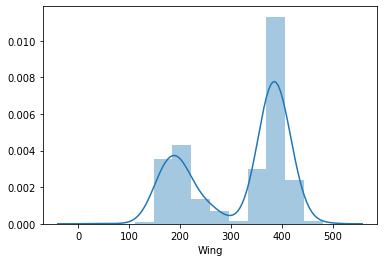

In [49]:
sns.distplot(hawk['Wing']);

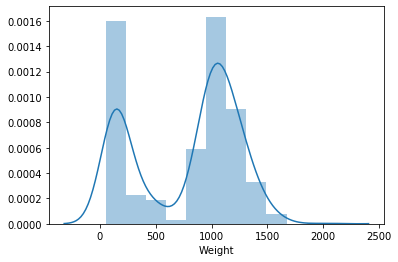

In [50]:
sns.distplot(hawk['Weight']);

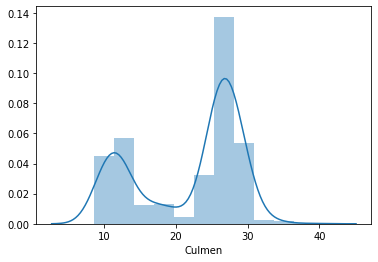

In [51]:
sns.distplot(hawk['Culmen']);

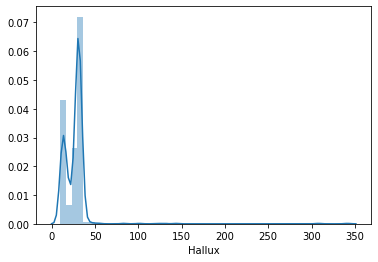

In [52]:
sns.distplot(hawk['Hallux']);

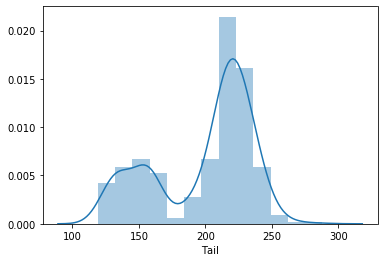

In [53]:
sns.distplot(hawk['Tail']);

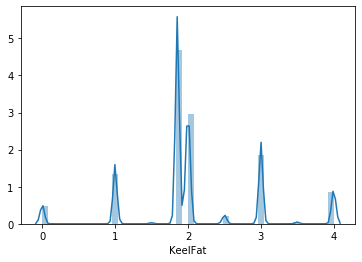

In [54]:
sns.distplot(hawk['KeelFat']);

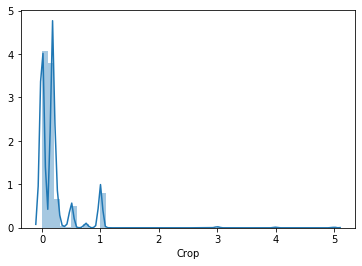

In [55]:
sns.distplot(hawk['Crop']);

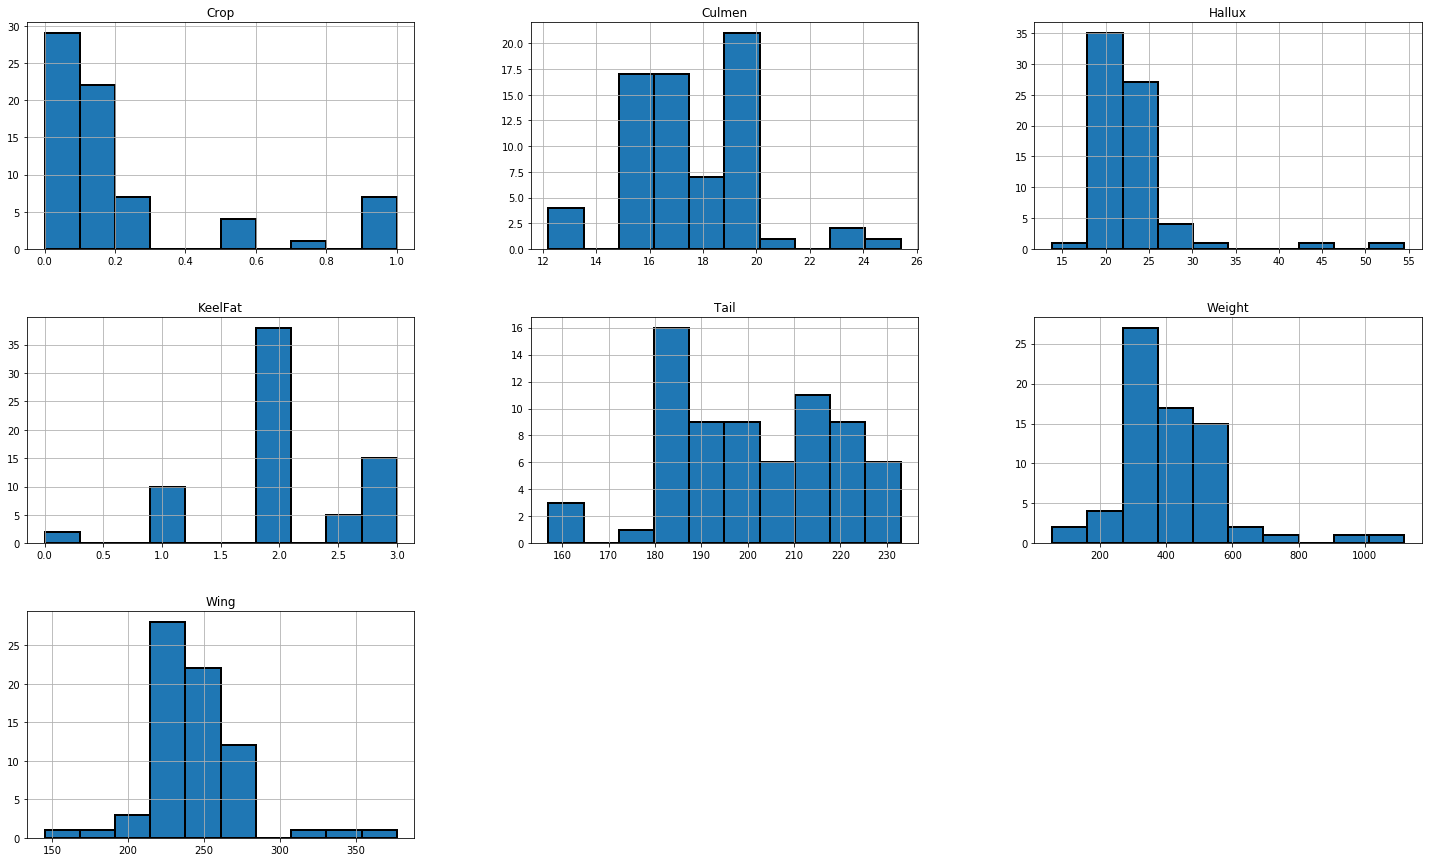

In [64]:
hawk_CH=(hawk.iloc[:, 9:17][hawk['Species']=='CH'])
hawk_CH.hist(edgecolor='black', linewidth=2)
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

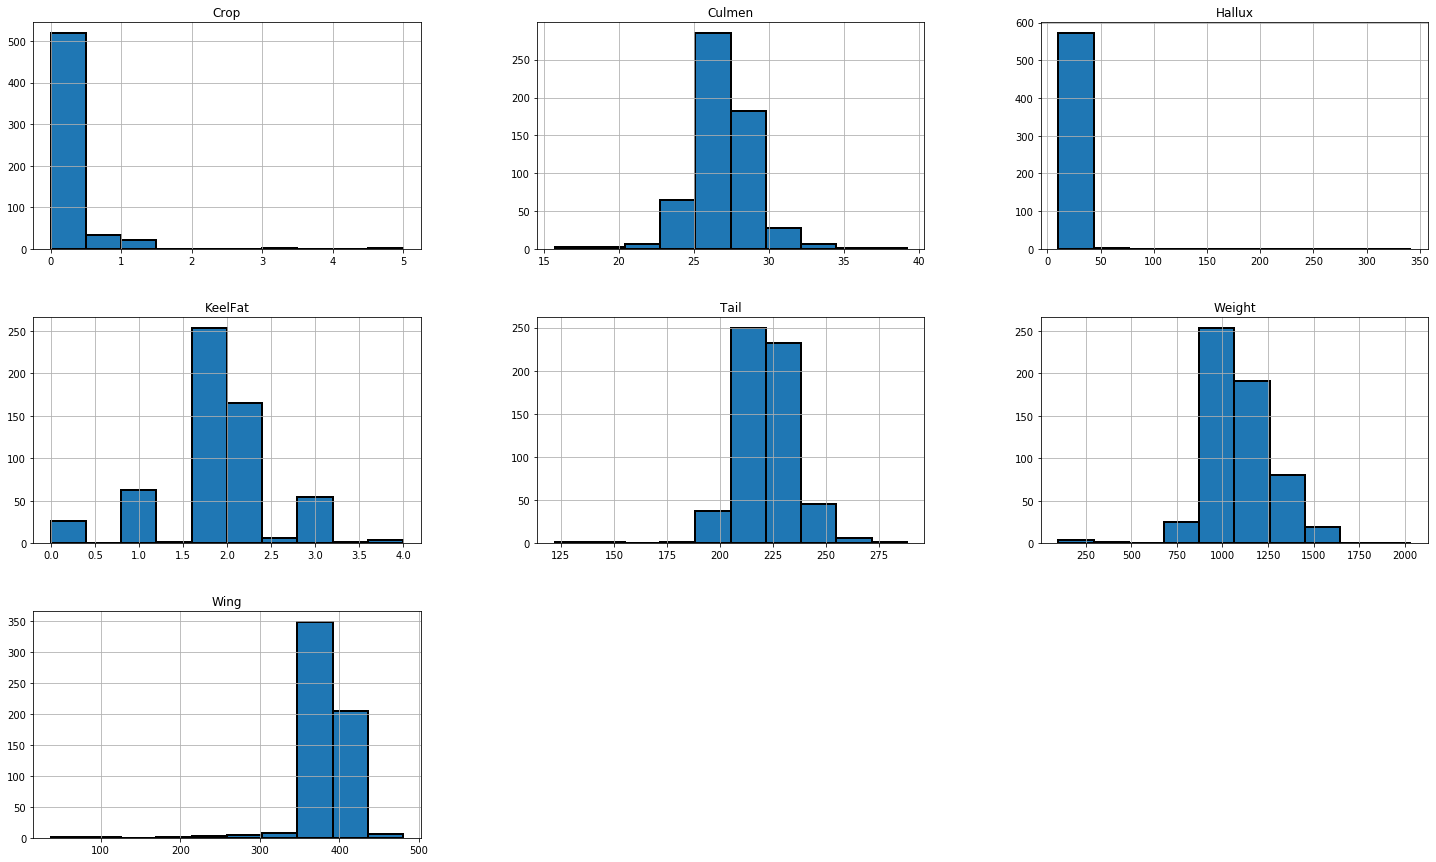

In [65]:
hawk_CH=(hawk.iloc[:, 9:17][hawk['Species']=='RT'])
hawk_CH.hist(edgecolor='black', linewidth=2)
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

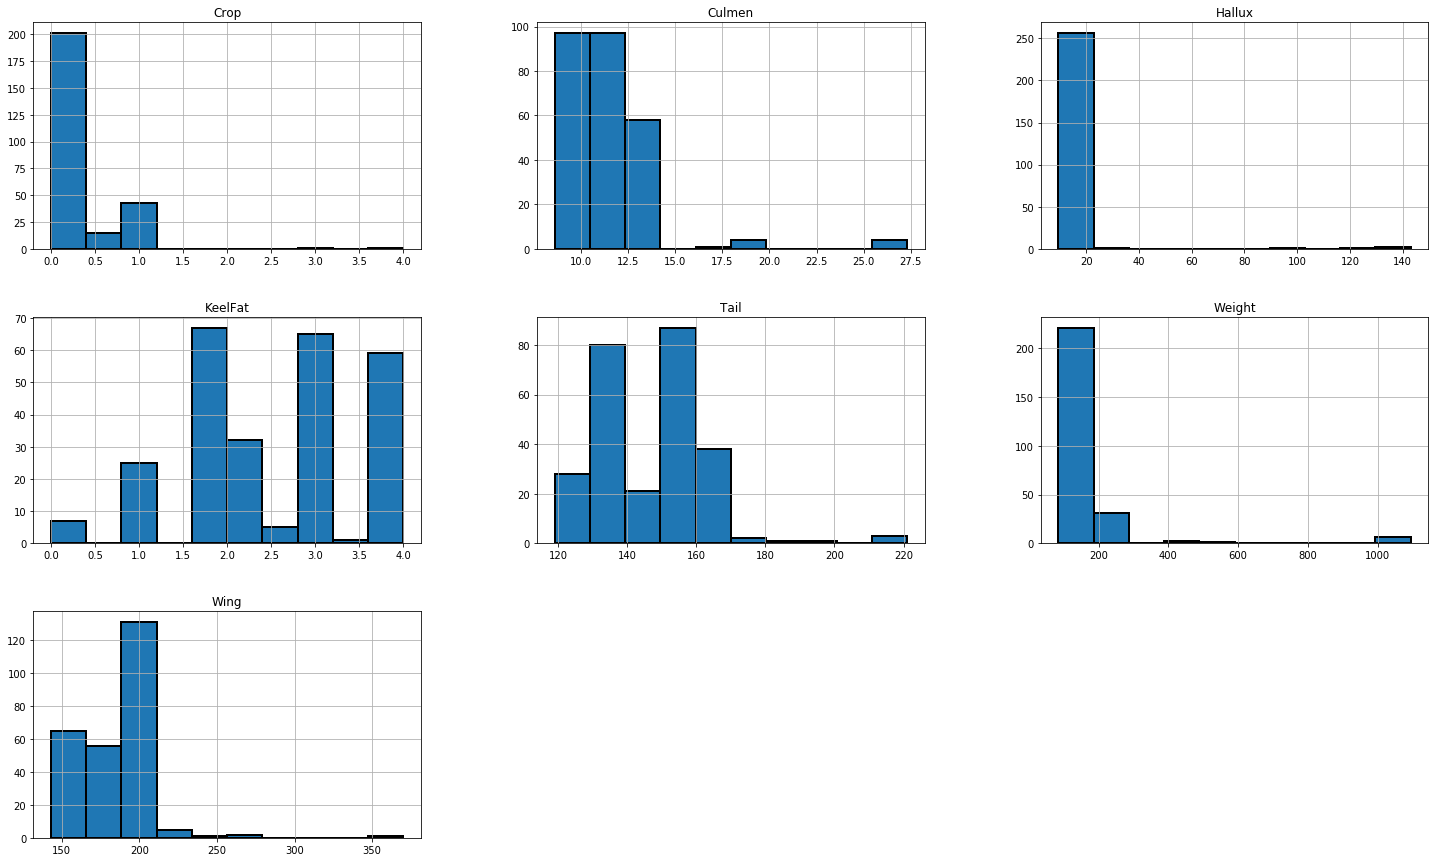

In [66]:
hawk_CH=(hawk.iloc[:, 9:17][hawk['Species']=='SS'])
hawk_CH.hist(edgecolor='black', linewidth=2)
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
X=hawk[['Wing', 'Weight', 'Culmen', 'Hallux' , 'Tail' , 'KeelFat' , 'Crop']]
y=hawk['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
clf=RandomForestClassifier(n_estimators=100 , class_weight="balanced")

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [101]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9853479853479854


In [102]:
clf.predict([[392, 1142, 27, 33, 235, 1, 0]])

array(['RT'], dtype=object)

In [103]:
from sklearn.metrics import confusion_matrix 

In [104]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 18,   1,   0],
       [  1, 166,   0],
       [  2,   0,  85]], dtype=int64)

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')

In [106]:

logreg_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print('The accuracy of the logistic Regression classifier with 10 fold cross-validation is ' + str(logreg_scores.mean()))

The accuracy of the logistic Regression classifier with 10 fold cross-validation is 0.9483091494141218


In [107]:
print(logreg_scores)

[0.95054945 0.88461538 0.94505495 0.97790055 0.98342541]


In [108]:
logreg_cv_mean = np.mean(logreg_scores)
logreg_cv_variance = np.var(logreg_scores)

print('logreg Mean score : ', logreg_cv_mean)
print('logreg Score variance : ', logreg_cv_variance)

logreg Mean score :  0.9483091494141218
logreg Score variance :  0.0012362615338547263
